## James Griffin
###  Stat  536


###### Targeted Marketing
Marketing campaigns are organized, strategized efforts to promote a specific company goal or product. In today’s modern society, marketing can reach consumers in a number of different ways including social media, apps and texts. However, the effectiveness of such campaigns depends on the ability of the campaign to reach interested individuals. Personalized marketing is the implementation of a marketing campaign by which companies deliver individualized products to recipients through data collection and analysis. In this analysis, you are to help a bank understand what customers are interested in their credit card so as to better target future marketing campaigns to interested individuals.

The dataset marketing.csv contains information on a marketing campaign designed to get customers to open a new bank credit card account. The variables in the dataset are as follows: 

1. age (numeric) 
2. job : type of job (categorical: “admin.”,“blue-collar”,“entrepreneur”,“housemaid”,“management”,“retired”,“self-employed”,“services”,“student”,“technician”,“unemployed”,“unknown”)
3.  marital : marital status (categorical: “divorced”,“married”,“single”,“unknown”; note: “divorced” means divorced or widowed)
4.  education (categorical: “basic.4y”,“basic.6y”,“basic.9y”,“high.school”,“illiterate”,“professional.course”,“university.degree”,“unknown”)
5.   default: has credit in default? (categorical: “no”,“yes”,“unknown”)
6.  housing: has housing loan? (categorical: “no”,“yes”,“unknown”)
7.  loan: has personal loan? (categorical: “no”,“yes”,“unknown”)
8. contact: contact communication type (categorical: “social”,“direct”) 
9.  month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
10.  day_of_week: last contact day of the week (categorical: “mon”,“tue”,“wed”,“thu”,“fri”)
11.  campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
12.  pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
13.  previous: number of contacts performed before this campaign and for this client (numeric)
14. poutcome: outcome of the previous marketing campaign (categorical: “failure”,“nonexistent”,“success”)
15. y - has the client opened a new account? (binary: “yes”,“no”)

In your analysis, make sure you answer the following questions:

* What characteristics of customers are more likely to take out a new credit card?
* Is there evidence that social media vs. personal contact is more effective in marketing?
* Does repeated contacting seem to increase the likelihood of a person taking out an account?

In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import seaborn  as sns
from sklearn import linear_model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
import warnings; warnings.simplefilter('ignore')
logreg = linear_model.LogisticRegression()

In [2]:
data = pd.read_csv("../data/targeted_marketing.csv", delimiter= ";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,call,may,mon,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,call,may,mon,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,call,may,mon,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,call,may,mon,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,call,may,mon,1,999,0,nonexistent,no


In [3]:
data.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

ok so we need to change education to categorical variables, I think I'm going to group the basic4,6 and 9 with the illiterate groups to just basic or no education. Highschool, university, professional course, I will need to leave one out, so I  will leave out the unknown category 

In [4]:
data['basic_edu'] = data.education.apply(lambda x: 1 if x in ['basic.9y', 
                                                              'basic.4y', 'basic.6y',
                                                              'illiterate'] else 0)
data['high_school'] = data.education.apply(lambda x: 1 if x == 'high.school' else 0)
data['college'] = data.education.apply(lambda x: 1 if x == 'university.degree' else 0)
data['pro_course'] = data.education.apply(lambda x: 1 if x == 'professional.course' else 0)

data = data.drop(columns = ['education'])

In [5]:
data.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [6]:
data['single'] = data.marital.apply(lambda x: 1 if x == 'single' else 0)
data['married'] = data.marital.apply(lambda x: 1 if x == 'married' else 0)
data['divorced'] =  data.marital.apply(lambda x: 1 if x == 'divorced' else 0)
data = data.drop(columns =['marital'])

In [7]:
data.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [8]:
data['job_admin'] = data.job.apply(lambda x: 1 if x == 'admin.' else 0)
data['job_blue_collar'] = data.job.apply(lambda x: 1 if x == 'blue-collar' else 0)
data['job_technician'] = data.job.apply(lambda x: 1 if x  == 'technician' else 0)
data['job_services'] = data.job.apply(lambda x: 1 if x == 'management' else 0)
data['job_retired'] = data.job.apply(lambda  x: 1 if x == 'retired' else 0)
data['job_self_emp'] = data.job.apply(lambda x: 1 if x in ['entrepreneur', 
                                                        'self-employed'] else 0)
data['job_other']  = data.job.apply(lambda x: 1  if x in ['housemaid', 'student', 
                                                         'unemployed',] else 0)
data = data.drop(columns = ['job'])

In [9]:
#default: has credit in default? (categorical: “no”,“yes”,“unknown”)
data['no_credit_default'] = data.default.apply(lambda x: 1 if x =='no' else 0)
data = data.drop(columns = ['default'])

In [10]:
data.housing.value_counts()
data['has_housing'] = data.housing.apply(lambda x: 1 if x == 'yes' else 0)
data['no_housing'] = data.housing.apply(lambda x: 1 if x == 'no' else 0)
data = data.drop(columns = ['housing'])

In [11]:
data.loan.value_counts()
data['yes_loan'] = data.loan.apply(lambda x: 1 if x == 'yes' else 0)
data['no_loan'] = data.loan.apply(lambda x: 1 if x == 'no' else 0)
data = data.drop(columns = ['loan'])

In [12]:
data.contact.value_counts()
#data['contact_social_media'] = data.contact.apply(lambda x: 1 if x == 'socialMedia' else 0)
#data['contact_call'] = data.contact.apply(lambda x: 1 if x == 'call' else 0)
#data = data.drop(columns = ['contact'])

def get_contact_type(df, t):
    if t == 'social_media':
        df['contact_social_media']= data.contact.apply(lambda x: 1 if x == 'socialMedia' else 0)
    if t == 'call':
        df['contact_call'] = df.contact.apply(lambda x: 1 if x == 'call' else 0)
    df = df.drop(columns = ['contact'])
    return df 
    
data['contact_social_media'] = get_contact_type(data, 'social_media')


In [13]:
#data.campaign.value_counts()
data.month.value_counts()
data['contact_summer'] = data.month.apply(lambda x: 1 if x in ['jun', 'jul', 'aug'] else 0)
data['contact_winter'] = data.month.apply(lambda x: 1 if x in ['dec', 'jan', 'feb'] else 0)
data['contact_spring'] = data.month.apply(lambda x: 1 if x in ['mar', 'apr', 'may'] else 0)
data['contact_fall'] = data.month.apply(lambda x: 1 if x in ['sep', 'oct', 'nov'] else 0)

data = data.drop(columns = ['month'])

In [14]:
data.day_of_week.value_counts()
data['day_of_week'] = data.day_of_week.apply(lambda x: 1 if x == 'mon' else 
                       (2 if x == 'tue' else 
                        (3 if x == 'wed' else 
                         (4 if x == 'thu' else 5))))
data = data.drop(columns = ['day_of_week'])



* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)


In [15]:
data.pdays.value_counts()
data['previously_contact'] = data.pdays.apply(lambda x: 1 if x != 999 else 0)
data = data.drop(columns = ['pdays'])

In [16]:
data.poutcome.value_counts()
data['previous_success'] = data.poutcome.apply(lambda x: 1 if x == 'success' else 0)
data['previous_failure'] = data.poutcome.apply(lambda x: 1 if x  == 'failure' else 0)
data = data.drop(columns = ['poutcome'])

In [17]:
data['y'] = data.y.apply(lambda x: 1 if x == 'yes' else 0)

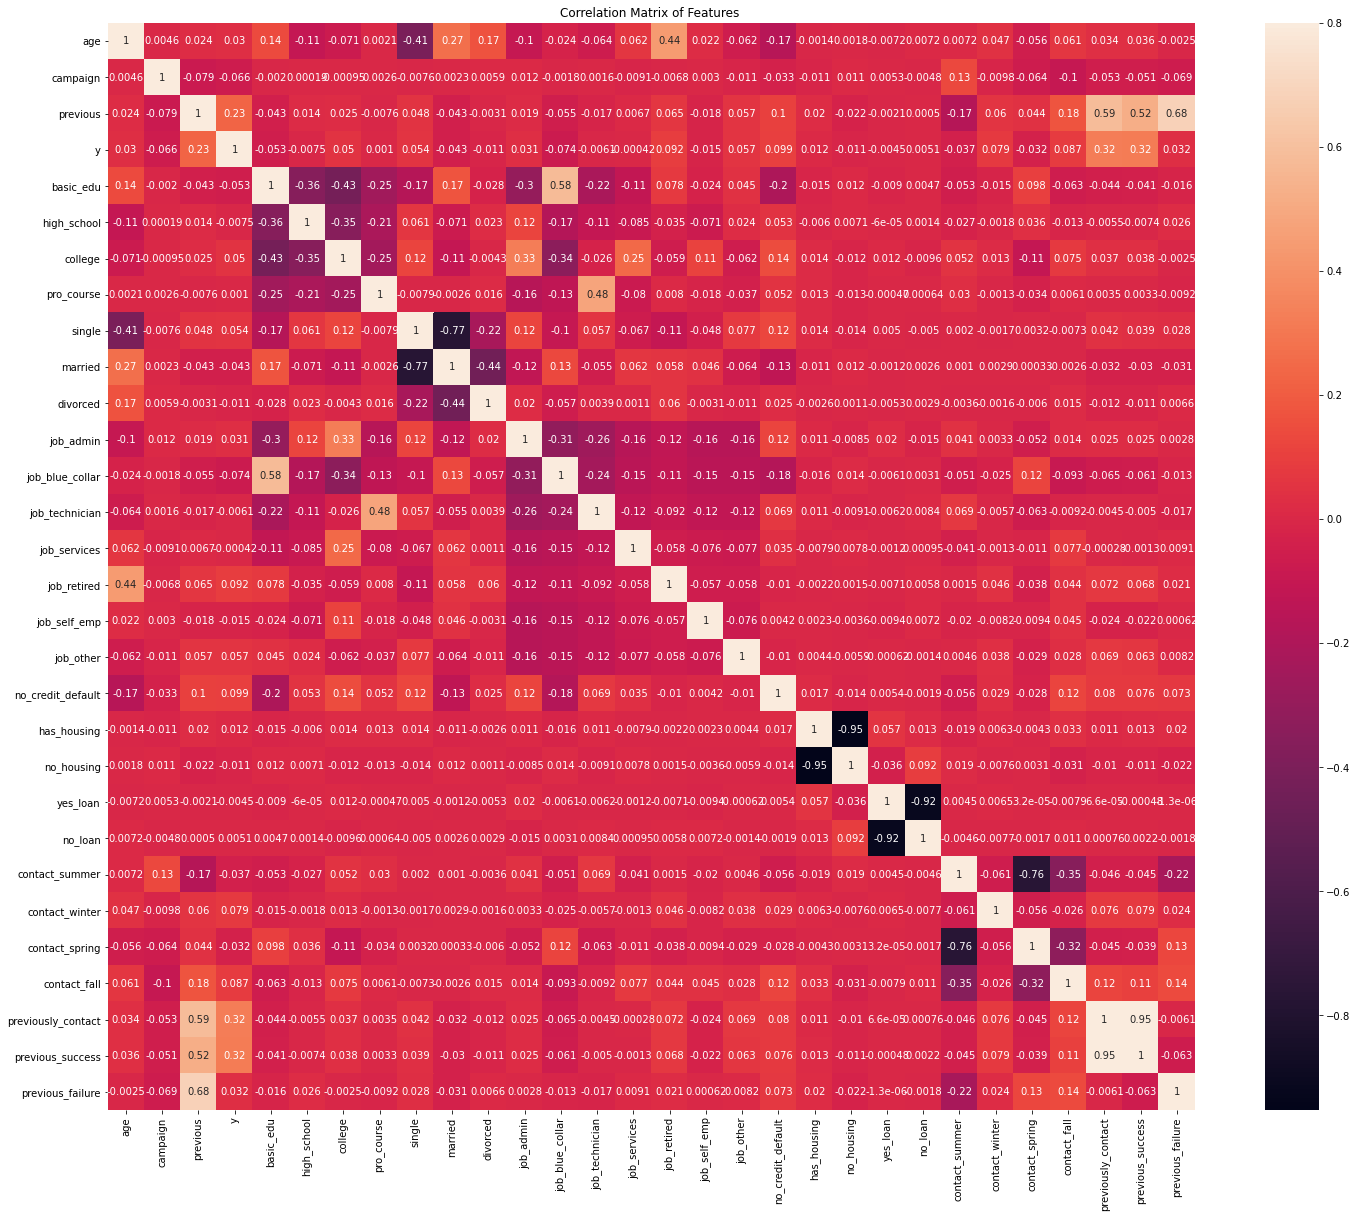

In [18]:
#lets visualize this one more way 
corr_mat = data.corr()
f, ax = plt.subplots(figsize = (25,20))
sns.heatmap(corr_mat,vmax=.8,square=True, annot = True)
plt.title("Correlation Matrix of Features ")
plt.show()

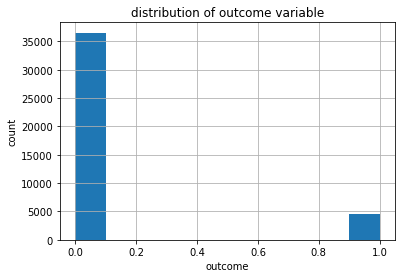

In [19]:
data.y.hist()
plt.title('distribution of outcome variable')
plt.xlabel('outcome')
plt.ylabel('count')
plt.show()

In [20]:
data = data.drop(columns = ['contact'])

ok so we'll probably need synthetically create a few observations of or positive outcome because if we don't the algorithm will likely just chose the 0 and be right like 90% of the time and we'll do this using SMOTE

Over-sampling using SMOTE
With our training data created, I’ll up-sample the no-subscription using the SMOTE algorithm(Synthetic Minority Oversampling Technique). At a high level, SMOTE:
* Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.
* Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

In [21]:
X = data.loc[:, data.columns != 'y']
y = data.loc[:, data.columns == 'y']


os = SMOTE(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=7)

columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  51058
Number of no subscription in oversampled data 25529
Number of subscription 25529
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [22]:
#ok now going to do some feature selection 
data_final_vars=data.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]


rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)


[ True False False  True  True False  True  True  True  True  True  True
  True  True False  True  True False  True  True False False  True  True
 False  True  True  True False False]
[ 1 11  6  1  1  2  1  1  1  1  1  1  1  1  3  1  1  8  1  1  4 10  1  1
  7  1  1  1  9  5]


In [23]:
cols = []
for i in range(len(list(rfe.support_))):
    if rfe.support_[i] == True:
        cols.append(X_train.columns[i])
cols

['age',
 'basic_edu',
 'high_school',
 'pro_course',
 'single',
 'married',
 'divorced',
 'job_admin',
 'job_blue_collar',
 'job_technician',
 'job_services',
 'job_self_emp',
 'job_other',
 'has_housing',
 'no_housing',
 'contact_social_media',
 'contact_summer',
 'contact_spring',
 'contact_fall',
 'previously_contact']

In [24]:
X=os_data_X[cols]
y=os_data_y['y']

In [25]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
train_prediction_probabilities = logreg.predict_proba(X_train)
test_prediction_probabilities = logreg.predict_proba(X_test)

In [ ]:
train_probs_for_actual_1 = [train_prediction_probabilities[i][1] for i, truth in enumerate(y_train)
                         if truth == 1]
train_probs_for_actual_0 = [train_prediction_probabilities[i][1] for i, truth in enumerate(y_train)
                         if truth == 0]
plt.hist(train_probs_for_actual_1, label='1', alpha = .5)
plt.hist(train_probs_for_actual_0, label='0', alpha = .5)
plt.legend(loc='upper left')

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import precision_recall_fscore_support

precisions, recalls, f1s = [], [], []
cutoffs = np.arange(0.05, 1, 0.05)
for cutoff in cutoffs:
    binary_test_predictions = [x[1] >= cutoff for x in test_prediction_probabilities]
    p, r, f1, s = precision_recall_fscore_support(y_test, binary_test_predictions)
    precisions.append(p[1])
    recalls.append(r[1])
    f1s.append(f1[1])
    
plt.plot(cutoffs, precisions, label='precision')
plt.plot(cutoffs, recalls, label='recall')
plt.plot(cutoffs, f1s, label='f1')
plt.xlabel("Positive Probability >=")
plt.title("Scores for Positive Class")
plt.legend()

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
sorted(list(zip(X.columns, logreg.coef_[0])), key=lambda x: x[1])

###### answer to question 2: 

contact_social_media  0.8279
calling contact = 
